# 0604 전처리해보기  
- Cabin 버리기 
- SibSp + Parch = Fsize 생성
- Ticket값이 같은 GroupSize 피쳐 만들고 Fare값 각각 평균채우기 
- Age : title과 fsize관계 따져서 NaN 처리
    - Pclass=1 & Ticket='PC' => 선착장 S(1), 중년(2) 여성(생존), 남자(사망) 
- Pclass, fsize, fare, embarked, title 

---
- 데이터 불러오기

In [352]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### Cabin drop

In [354]:
drop_feature = ['Cabin']
train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

---
### Ticket 같은 사람 새로운 컬럼 만들기 GroupSize

In [355]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [356]:
# 서영이 코드
# for ticketnum in train['Ticket'].unique():
#     print(ticketnum)
#     print(len(train[train['Ticket']==ticketnum]['Ticket']))

In [358]:
test['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [347]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [359]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Ticket_'] = dataset['Ticket'].str.split(' ').str[1]    # 공백으로 분리하고 뒤 숫자만 뽑기
    dataset['Ticket_'].fillna(dataset['Ticket'].str.extract(r'(\d+)')[0], inplace=True)     # 숫자만있는 ticket 뽑기
    dataset.loc[dataset.Ticket_ == '2.','Ticket_'] = train['Ticket'].str.split('.').str[1]      # .으로 분리 후 숫자 뽑기
    dataset.loc[dataset.Ticket_ == 'Basle','Ticket_'] = 541     # 이상한값 숫자로 바꿔주기
    dataset['Ticket_'].fillna(1601, inplace=True)       # 가장 많은 값으로 nan 처리
    dataset['Ticket_'].value_counts()

In [360]:
from collections import Counter

df = []

for i,ticket in enumerate(train['Ticket_']):
    df.append(Counter(train['Ticket_'])[ticket])
    #df.append(len(train[train['Ticket']==ticketnum][Ticket]))
    
    
train['GroupSize'] = df
train['GroupSize'].value_counts()

# test

df = []

for i,ticket in enumerate(test['Ticket_']):
    df.append(Counter(test['Ticket_'])[ticket])
    
test['GroupSize'] = df
test['GroupSize'].value_counts()

GroupSize
1    317
2     70
3     18
4      8
5      5
Name: count, dtype: int64

In [361]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [365]:
test.loc[test['Ticket_']=='C','Ticket_'] = 3101291

In [366]:
train['Ticket_'] = train['Ticket_'].astype(int) 
test['Ticket_'] = test['Ticket_'].astype(int) 

---
### Embarked 원핫인코딩
- nan 처리 => S

In [367]:
train.loc[train['Embarked'].isnull(),'Embarked'] = 'S'

In [368]:
train = pd.get_dummies(train, columns = ['Embarked'],dtype=int)
test = pd.get_dummies(test, columns = ['Embarked'],dtype=int)

In [ ]:
# embarked_mapping = {'S':0,'C':1,'Q':2}

# train['Embarked'] = train['Embarked'].map(embarked_mapping)
# test['Embarked'] = test['Embarked'].map(embarked_mapping)

---
### Title Mapping, Feature
- Master ==> 0
- Miss : Mlle, Ms, Countess ==> 1      
- Mrs : 'Lady','Dona' ==> 2
- Mr : 'Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer','Don'  ==> 3 

In [369]:
train['Title'] = train['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)
test['Title'] = test['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)

In [370]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [371]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [372]:
train_test_data = [train, test]

for train_title in train_test_data : 
    train_title['Title'] = train_title['Title'].replace(['Mlle', 'Ms', 'Countess'],'Miss')
    train_title['Title'] = train_title['Title'].replace(['Mme', 'Dr', 'Sir','Capt','Rev','Major','Col','Jonkheer','Don'],'Mr')
    train_title['Title'] = train_title['Title'].replace(['Lady','Dona'],'Mrs')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Ticket_,GroupSize,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,21171,1,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,17599,1,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3101282,1,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,113803,2,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,373450,1,0,0,1,Mr


In [373]:
# title feature
title_mapping = {'Master':0, 'Miss':1,'Mrs':2,'Mr':3}

train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [374]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Ticket_      891 non-null    int32  
 11  GroupSize    891 non-null    int64  
 12  Embarked_C   891 non-null    int32  
 13  Embarked_Q   891 non-null    int32  
 14  Embarked_S   891 non-null    int32  
 15  Title        891 non-null    int64  
dtypes: float64(2), int32(4), int64(7), object(3)
memory usage: 97.6+ KB


---
### Fsize = SibSp + Parch + 1
- 함께 탑승한 인원 확인하기

In [375]:
train['Fsize'] = train['SibSp'] + train['Parch'] + 1
test['Fsize'] = test['SibSp'] + test['Parch'] + 1

---
### Age Mapping

In [376]:
# Age Feature 

train_test_data = [train, test]

for age_feature in train_test_data : 
    age_feature.loc[age_feature['Age']<=16,'Age'] = 0
    age_feature.loc[(age_feature['Age'] > 16) & (age_feature['Age'] < 30),'Age'] = 1
    age_feature.loc[(age_feature['Age'] >= 30) & (age_feature['Age'] <50),'Age'] = 2
    age_feature.loc[(age_feature['Age'] > 50),'Age'] = 3

In [377]:
# Age NaN 처리
for age_nan in train_test_data : 
    # Mr인 혼자인 남성은 age 2로 채우기 
    age_nan.loc[(age_nan['Title']==3)&(age_nan['Sex']=='male'),'Age'] = 2

    # Mrs인 동승자 있는 여성 age 2로 채우기 
    age_nan.loc[(age_nan['Title']==2)&(age_nan['Fsize']>=2),'Age'] = 2

    # Master age 0로 채우기 => 가족여행 온 어린 아이로 예측
    age_nan.loc[(age_nan['Title']==0), 'Age'] = 0

    # Miss age 1로 채우기 => 여행온 젊은이라고 예측
    age_nan.loc[(age_nan['Title']==1), 'Age'] = 1 

    # Mr age 3으로 채우기 => 청년일것을 예측
    age_nan.loc[(age_nan['Title']==3)&(age_nan['Age'].isnull()), 'Age'] = 1

    # Mrs age 2로 채우기 => 생존률이 높은 것으로보아 엄마는 청년으로 예측
    age_nan.loc[(age_nan['Title']==2)&(age_nan['Age'].isnull()), 'Age'] = 1

In [378]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Ticket_      891 non-null    int32  
 11  GroupSize    891 non-null    int64  
 12  Embarked_C   891 non-null    int32  
 13  Embarked_Q   891 non-null    int32  
 14  Embarked_S   891 non-null    int32  
 15  Title        891 non-null    int64  
 16  Fsize        891 non-null    int64  
dtypes: float64(2), int32(4), int64(8), object(3)
memory usage: 104.5+ KB


In [379]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Ticket_      418 non-null    int32  
 10  GroupSize    418 non-null    int64  
 11  Embarked_C   418 non-null    int32  
 12  Embarked_Q   418 non-null    int32  
 13  Embarked_S   418 non-null    int32  
 14  Title        418 non-null    int64  
 15  Fsize        418 non-null    int64  
dtypes: float64(2), int32(4), int64(7), object(3)
memory usage: 45.8+ KB


---
### Fare feature, NaN 
- Fare 0~30  =>  1
- Fare 30~250  => 2
- Fare 251~  => 3

In [380]:
import seaborn as sns

In [381]:
# test data fare NaN 처리 ==> pclass의 중앙값으로 채우기 
test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median')
    , inplace= True
)

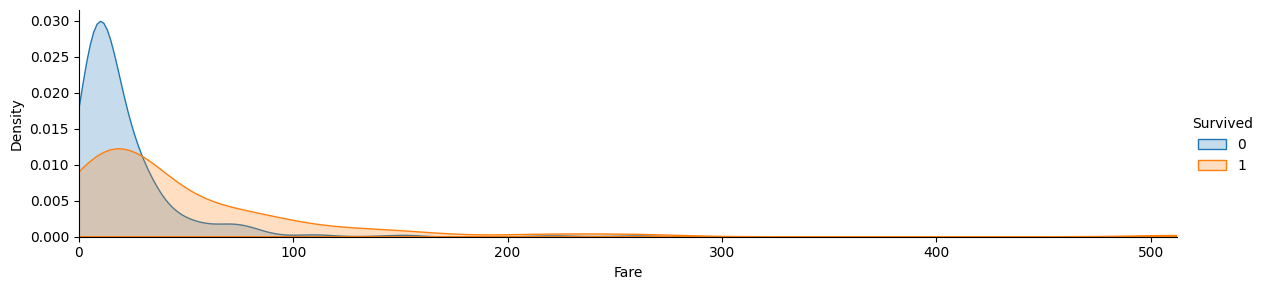

In [382]:
# Fare별 Survived 시각화 
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

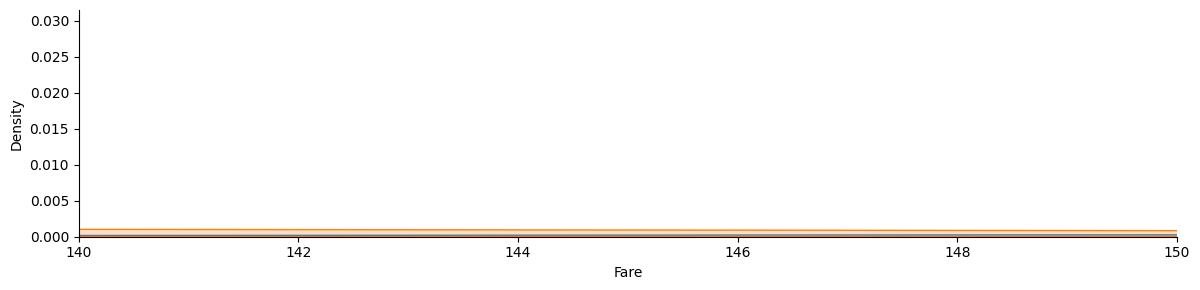

In [383]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(140,150))

In [384]:
train[train['Fsize']>1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Ticket_,GroupSize,Embarked_C,Embarked_Q,Embarked_S,Title,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,21171,1,0,0,1,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,17599,1,1,0,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,113803,2,0,0,1,2,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,349909,4,0,0,1,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2.0,0,2,347742,11.1333,347742,3,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,2.0,1,0,P/PP 3381,24.0000,3381,2,1,0,0,2,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,2.0,0,1,11767,83.1583,11767,2,1,0,0,2,2
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,2.0,0,1,230433,26.0000,230433,2,0,0,1,2,2
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,2.0,0,5,382652,29.1250,382652,5,0,1,0,2,6


- fsize에 따른 fare 값 조정하기 

In [385]:
# fsize 알아보기 
train['Fsize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [386]:
for fare_fsize in train_test_data :
    fare_fsize.loc[(fare_fsize['Fsize']>1),'Fare'] = fare_fsize['Fare']/fare_fsize['GroupSize']

In [387]:
train[train['Fsize']>1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Ticket_,GroupSize,Embarked_C,Embarked_Q,Embarked_S,Title,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.25000,21171,1,0,0,1,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.28330,17599,1,1,0,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,26.55000,113803,2,0,0,1,2,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,5.26875,349909,4,0,0,1,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2.0,0,2,347742,3.71110,347742,3,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,2.0,1,0,P/PP 3381,12.00000,3381,2,1,0,0,2,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,2.0,0,1,11767,41.57915,11767,2,1,0,0,2,2
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,2.0,0,1,230433,13.00000,230433,2,0,0,1,2,2
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,2.0,0,5,382652,5.82500,382652,5,0,1,0,2,6


In [388]:
# fare 구간 나누기 
for fare_feature in train_test_data : 
    fare_feature.loc[fare_feature['Fare'] <=10, 'Fare'] = 0
    fare_feature.loc[(fare_feature['Fare'] > 10) & (fare_feature['Fare']<=30)  , 'Fare'] = 1
    fare_feature.loc[(fare_feature['Fare'] > 30) & (fare_feature['Fare']<=100) , 'Fare'] = 2
    fare_feature.loc[fare_feature['Fare'] > 100, 'Fare'] = 3

---
### Sex Feature
- male : 0
- female : 1

In [389]:
sex_mapping = {'male':0,'female':1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] =  test['Sex'].map(sex_mapping)

In [390]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Ticket_      891 non-null    int32  
 11  GroupSize    891 non-null    int64  
 12  Embarked_C   891 non-null    int32  
 13  Embarked_Q   891 non-null    int32  
 14  Embarked_S   891 non-null    int32  
 15  Title        891 non-null    int64  
 16  Fsize        891 non-null    int64  
dtypes: float64(2), int32(4), int64(9), object(2)
memory usage: 104.5+ KB


---
### Name, SibSp, Parch, Age, Fare 삭제 

In [391]:
drop_feature=['Name','SibSp','Parch','Age','Fare','Ticket']

train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

In [392]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 10), (891,))

In [394]:
train

,PassengerId,Survived,Pclass,Sex,Ticket_,GroupSize,Embarked_C,Embarked_Q,Embarked_S,Title,Fsize
0,1,0,3,0,21171,1,0,0,1,3,2
1,2,1,1,1,17599,1,1,0,0,2,2
2,3,1,3,1,3101282,1,0,0,1,1,1
3,4,1,1,1,113803,2,0,0,1,2,2
4,5,0,3,0,373450,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,211536,1,0,0,1,3,1
887,888,1,1,1,112053,1,0,0,1,1,1
888,889,0,3,1,6607,2,0,0,1,1,4
889,890,1,1,0,111369,1,1,0,0,3,1


In [395]:
test

,PassengerId,Pclass,Sex,Ticket_,GroupSize,Embarked_C,Embarked_Q,Embarked_S,Title,Fsize
0,892,3,0,330911,1,0,1,0,3,1
1,893,3,1,363272,1,0,0,1,2,2
2,894,2,0,240276,1,0,1,0,3,1
3,895,3,0,315154,1,0,0,1,3,1
4,896,3,1,3101298,1,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,3236,1,0,0,1,3,1
414,1306,1,1,17758,1,1,0,0,2,1
415,1307,3,0,3101262,1,0,0,1,3,1
416,1308,3,0,359309,1,0,0,1,3,1


---
### ★ Feature 중요도, 상관관계 알아보기 

In [397]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Ticket_,GroupSize,Embarked_C,Embarked_Q,Embarked_S,Title,Fsize
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,-0.022105,0.005978,-0.001205,-0.033606,0.022204,0.067549,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.095609,0.042790,0.168240,0.003650,-0.149683,-0.471579,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,0.284027,-0.007418,-0.243292,0.221009,0.074053,0.015212,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.075702,0.152707,0.082853,0.074115,-0.119224,-0.694154,0.200988
Ticket_,-0.022105,-0.095609,0.284027,-0.075702,1.000000,-0.030048,-0.193438,-0.002860,0.171259,0.029613,0.015826
GroupSize,0.005978,0.042790,-0.007418,0.152707,-0.030048,1.000000,-0.026334,-0.073892,0.069570,-0.327657,0.746167
Embarked_C,-0.001205,0.168240,-0.243292,0.082853,-0.193438,-0.026334,1.000000,-0.148258,-0.782742,-0.031692,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,0.074115,-0.002860,-0.073892,-0.148258,1.000000,-0.499421,-0.116215,-0.058592
Embarked_S,0.022204,-0.149683,0.074053,-0.119224,0.171259,0.069570,-0.782742,-0.499421,1.000000,0.100897,0.077359
Title,0.067549,-0.471579,0.015212,-0.694154,0.029613,-0.327657,-0.031692,-0.116215,0.100897,1.000000,-0.391869


In [398]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Ticket_      418 non-null    int32
 4   GroupSize    418 non-null    int64
 5   Embarked_C   418 non-null    int32
 6   Embarked_Q   418 non-null    int32
 7   Embarked_S   418 non-null    int32
 8   Title        418 non-null    int64
 9   Fsize        418 non-null    int64
dtypes: int32(4), int64(6)
memory usage: 26.2 KB


---
### Modeling

In [399]:
# 교차 검증에 필요한 라이브러리 임포트
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# 분류기 모델 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


---
#### KNN

In [400]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score1 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score1)*100, 2)


63.29

---
#### Decision Tree

In [401]:
clf = RandomForestClassifier(n_estimators=13)
score3 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score3)*100, 2)


81.25

---
#### Navie Bapes

In [402]:
clf = GaussianNB()
score4 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score4)*100, 2)


61.62

---
#### Gradient Boost

In [403]:
clf = GradientBoostingClassifier(n_estimators = 100)
score5 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score5)*100, 2)

83.84

---
#### XGBoost

In [404]:
clf = XGBClassifier()
score6 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score6)*100, 2)

82.26

---
#### Light GBM

In [405]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
score7 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score7)*100, 2)

81.03

---
#### 앙상블 

In [406]:
from sklearn.ensemble import VotingClassifier

# 개별 모델 생성
knn = KNeighborsClassifier(n_neighbors = 13)
rf = RandomForestClassifier(n_estimators=13)
gbm = GradientBoostingClassifier()

voting_model = VotingClassifier(
    estimators=[('knn',knn),('rf',rf),('gbm',gbm)],
    voting='soft'
)

score10 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

round(np.mean(score10)*100, 2)

81.03

In [407]:
y_titanic_df = target
X_titanic_df = train_data
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape) 

(712, 10) (179, 10)
(569, 10) (143, 10)


#### ★ 최적의 파라미터 구하기 

In [ ]:
# !pip install hyperopt

In [408]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe

searchpara = {'max_depth': hp.quniform('max_depth',5,20,1),
              'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
              'learning_late': hp.uniform('learning_late',0.01,0.2),
              'colsample_bytree': hp.uniform('colsample_bytree', 0.5,1),
            #   'lambda' : hp.quniform('lambda',0.01,2,0.01),
              'gamma' : hp.quniform('gamma',0.01,2,0.01),
              'n_estimators' : hp.quniform('n_estimators',1,1000,1), 
              'random_state' : hp.quniform('random_state',1,1000,1), 
              'min_samples_leaf' : hp.quniform('min_samples_leaf',1,30,1)} 

In [409]:
def objective_func(search_space):
    rf_clf = XGBClassifier(n_estimators=int(search_space['n_estimators'])
                            , max_depth=int(search_space['max_depth'])
                            ,random_state=int(search_space['random_state'])
                            # ,min_samples_leaf=int(search_space['min_samples_leaf'])
                            ,gamma=int(search_space['gamma'])
                            ,colsample_bytree=int(search_space['colsample_bytree'])
                            ,min_child_weight=int(search_space['min_child_weight'])
                            # ,learning_late=int(search_space['learning_late'])
                           )
    rf_clf.fit(train_data , target)
    pred = rf_clf.predict(test)
    submission1 = pd.read_csv('./submission (1).csv')
    del submission1['PassengerId']
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(pred, submission1)
    return {'loss' : -accuracy, 'status' : STATUS_OK}

In [410]:
from hyperopt import fmin, tpe, Trials


trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=searchpara,
            algo=tpe.suggest,
            max_evals=1000, # 최대 반복 횟수를 지정합니다.
            trials=trials, 
            rstate=np.random.default_rng(seed=30))

print('best:', best)

100%|██████████| 1000/1000 [09:07<00:00,  1.83trial/s, best loss: -0.8086124401913876]
best: {'colsample_bytree': 0.6309975184727399, 'gamma': 1.51, 'learning_late': 0.0425528376360206, 'max_depth': 13.0, 'min_child_weight': 1.0, 'min_samples_leaf': 15.0, 'n_estimators': 497.0, 'random_state': 149.0}


In [975]:
from hyperopt import hp

clf = xgb.XGBClassifier() # Model object 
scoring = 'accuracy' # 평가지표 : 정확도 
parameters = {'max_depth':[2,3,4],'n_estimators':[3,5,7], 'random_state': [10,30,50]} 
grid_dclf = Hyper(clf, param_grid=parameters, scoring='accuracy', cv=7) 
grid_dclf.fit(X_train,y_train) 
print(grid_dclf.best_params_) 
print(grid_dclf.best_score_)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring) 

{'max_depth': 2, 'n_estimators': 3, 'random_state': 10}
0.8329589261447152


---
- XGBoost 적용 

In [125]:
import xgboost as xgb

clf = xgb.XGBClassifier(colsample_bytree= 0.5988096002481905, gamma= 0.44, learning_late= 0.1283804635750339, max_depth= 14, min_child_weight= 1, min_samples_leaf=8, n_estimators=75, random_state= 0)
scoring = 'accuracy'
score7 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score7.mean())

[15:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_late", "min_samples_leaf" } are not used.

[15:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_late", "min_samples_leaf" } are not used.

[15:04:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_late", "min_samples_leaf" } are not used.

[15:04:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learning_late", "min_samples_leaf" } are not used.

[15:04:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

In [ ]:
# XGBOOST도 점수가 항상 바뀌는 이유는? 

---
- RandomForest 적용

In [411]:
# 점수 확인
k_fold = KFold(n_splits=20, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=2, random_state =0)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs=-1, scoring=scoring)

print(score.mean())

0.8159343434343436


In [412]:
clf.fit(train_data, target)

prediction = clf.predict(test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [413]:
from sklearn.metrics import accuracy_score

submission1 = pd.read_csv('./submission (1).csv')
del submission1['PassengerId']
accuracy = accuracy_score(prediction,submission1)
accuracy

0.7966507177033493

In [448]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], 
        "Survived":prediction
    }
)
submission.to_csv('0605test1.csv', index=False)